## <p style="text-align: center;">☁️FARMTECH NA ERA DA CLOUD COMPUTING☁️</p>
##### <p style="text-align: center;">GRUPO 15: Iolanda Manzali, Jônatas Gomes , Murilo Carone, Pedro Sousa e Yago Iama<p></p>

### <p style="text-align: center;">ENTREGA l </p>
###### * Fazer uma análise exploratoria do dataset 'crop_yeld.csv'
###### * Encontrar tendencias para o rendimenTo das plantações, por meio de clusterizações e identificar se há cenários discrepantes
###### * Fazer 5 modelos preditivos

### PARTE 1. ANÁLISE EXPLORATÓRIA

###### 1.1 IMPORTANDO AS BIBLIOTECAS E MÓDULOS NECESSÁRIOS

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


###### 1.2 CARREGANDO O DATASET 'crop_yeld.csv'

In [5]:
df = pd.read_csv('crop_yield.csv')

In [ ]:
# utilizada função display para mostrar o dataset em formatação de Tabela
display(df)

In [ ]:
# visualização das primeiras 10 linhas do dataset
display(df.head(10))

###### 1.3 VISUALIZAÇÃO E TRATAMENTO DO DATASET

In [ ]:
display(df.sample(10))

In [ ]:
df.info()

In [ ]:
df.isnull().sum()


In [ ]:
duplicates = df.duplicated().sum()
print(f'O número de dados duplicados é: {duplicates}')

###### obs: dataset sem valores nulos, ausentes ou duplicados.Unica coluna com valores não-numéricos é a coluna 'Crop'.

###### 1.4 MEDIDAS DE TENDENCIA CENTRAL E QUARTIS DO DATASET

In [ ]:
display(df.describe())

In [7]:
# padronizando variável categórica ('crop') em variável numérica
df['Crop'].unique()
mapping = {'Cocoa, beans': 1, 'Rice, paddy': 2, 'Oil palm fruit': 3, 'Rubber, natural': 4}
df['Crop'] = df['Crop'].map(mapping)

In [ ]:
# visualizando o resultado do mapping
display(df)

###### VERIFICANDO A PRESENÇA DE OUTLIERS

In [ ]:
# Boxplot
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='pastel')
plt.title('Distribuição das Variáveis e Identificação de Outliers')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Scatter plots com outliers destacados

from scipy.stats import zscore

sns.set(style="whitegrid")


numeric_vars = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
                'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

# IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Criando scatter plots para cada variável numérica
for var in numeric_vars:
    # Identificando outliers para a variável atual
    outliers = identify_outliers(df, var)
        
    plt.figure(figsize=(12, 8))
    
    # adicionado alpha de 0.5 para melhor visualizaçaõ dos dados no gráfico
    sns.scatterplot(x=var, y='Yield', data=df, hue='Crop', palette='viridis', alpha= 0.5)
    
    # Plotando os outliers em vermelho
    if not outliers.empty:
        sns.scatterplot(x=var, y='Yield', data=outliers, color='red', label='Outliers', s=100, edgecolor='black', alpha = 0.5)
    
    
    plt.title(f'Scatter Plot: {var} vs. Rendimento com Outliers Destacados')
    plt.xlabel(var)
    plt.ylabel('Rendimento (toneladas/hectare)')
    plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
# Gráficos de Dispersão 

sns.set(style="whitegrid")

climate_vars = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
                'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']

crops = df['Crop'].unique()

# IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Gráficos de dispersão subplotados por cultura, com outliers destacados em vermelho
for var in climate_vars:
    fig, axes = plt.subplots(nrows=1, ncols=len(crops), figsize=(20, 5))
    fig.suptitle(f'Rendimento vs {var} por Cultura (Outliers em Vermelho)', fontsize=16)
    
    for i, crop in enumerate(crops):
        crop_data = df[df['Crop'] == crop]
        
        
        outliers = identify_outliers(crop_data, var)
        
        # Plotar não-outliers em verde
        sns.scatterplot(data=crop_data, x=var, y='Yield', ax=axes[i], color='darkgreen', label='Dados Normais')
        
        # Plotar outliers em vermelho
        if not outliers.empty:
            sns.scatterplot(data=outliers, x=var, y='Yield', ax=axes[i], color='red', label='Outliers')
        
        axes[i].set_title(crop)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Rendimento (toneladas/hectare)')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

###### Comentários:  presença de outliers relacionados às variáveis 'temperature at 2 Meters'  e variáveis de umidade em todas as culturas analizadas. Com relacao à temperatura há um predominio de outliers se sobrepondo com a cultura de palm oil fruit. 

###### 1.5 VISUALIZAÇÃO GRÁFICA

###### Separando os dados por cultura e configurando as cores para cada cultura

###### Variável Climática e Rendimento

In [ ]:

# Mapeamento das culturas para cores
mapping = {'Cocoa, beans': 1, 'Rice, paddy': 2, 'Oil palm fruit': 3, 'Rubber, natural': 4}

colors = {
    '1': 'blue',  # Cocoa, beans
    '2': 'green',  # Rice, paddy
    '3': 'red',  # Oil palm fruit
    '4': 'purple'  # Rubber, natural
}

sns.set(style="whitegrid")

# Subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relação entre Variáveis Climáticas e Rendimento por Cultura', fontsize=16)

# Adicionado correção alpha de 0.5 para melhor visualização dos dados das culturas 'Cocoa, beans' e 'Rubber, natural'
for crop_name, crop_code in mapping.items():
    crop_df = df[df['Crop'] == crop_name]
    axes[0, 0].scatter(crop_df['Precipitation (mm day-1)'], crop_df['Yield'], color=colors[str(crop_code)], label=crop_name, alpha=0.5)
    axes[0, 1].scatter(crop_df['Specific Humidity at 2 Meters (g/kg)'], crop_df['Yield'], color=colors[str(crop_code)], label=crop_name, alpha=0.5)
    axes[1, 0].scatter(crop_df['Relative Humidity at 2 Meters (%)'], crop_df['Yield'], color=colors[str(crop_code)], label=crop_name, alpha=0.5)
    axes[1, 1].scatter(crop_df['Temperature at 2 Meters (C)'], crop_df['Yield'], color=colors[str(crop_code)], label=crop_name, alpha=0.5)

# Rótulos dos eixos
axes[0, 0].set_xlabel('Precipitação (mm/dia)')
axes[0, 0].set_ylabel('Rendimento (toneladas/hectare)')
axes[0, 1].set_xlabel('Umidade Específica a 2m (g/kg)')
axes[0, 1].set_ylabel('Rendimento (toneladas/hectare)')
axes[1, 0].set_xlabel('Umidade Relativa a 2m (%)')
axes[1, 0].set_ylabel('Rendimento (toneladas/hectare)')
axes[1, 1].set_xlabel('Temperatura a 2m (C)')
axes[1, 1].set_ylabel('Rendimento (toneladas/hectare)')

# Legenda
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 1.0), title='Cultura')

plt.tight_layout()
plt.show()

###### COMENTÁRIOS: 
| Cultura              | Cor    | Resposta à Precipitação | Resposta à Umidade Específica | Resposta à Umidade Relativa | Resposta à Temperatura | Rendimento Geral |
|----------------------|--------|--------------------------|--------------------------------|----------------------------|-------------------------|-------------------|
| Cacau (Cocoa, beans) | Azul   | Estável, pouca variação  | Estável, pouca variação        | Estável, pouca variação    | Estável, pouca variação | Baixo-médio       |
| Arroz (Rice, paddy)  | Verde  | Estável, pouca variação  | Estável, pouca variação        | Estável, pouca variação    | Estável, pouca variação | Baixo             |
| Palma de Óleo (Oil palm fruit) | Vermelho | Leve aumento com variação | Estável, pouca variação | Estável, pouca variação | Estável, pouca variação | Baixo             |
| Borracha Natural (Rubber, natural) | Roxo   | Aumento com precipitação | Aumento com umidade específica | Aumento com umidade relativa | Aumento com temperatura | Alto              |

In [ ]:
sns.set(style="whitegrid")


crops = df['Crop'].unique()

colors = {
    'Cocoa, beans': 'blue',
    'Oil palm fruit': 'green',
    'Rice, paddy': 'orange',
    'Rubber, natural': 'red'
}


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribuição do Rendimento por Cultura', fontsize=16)

# 1. Histograma 
for crop in crops:
    crop_data = df[df['Crop'] == crop]
    sns.histplot(crop_data['Yield'], kde=True, color=colors[crop], label=crop, ax=axes[0], alpha=0.6)

axes[0].set_title('Histograma do Rendimento')
axes[0].set_xlabel('Rendimento (toneladas/hectare)')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='Cultura')

# 2. Boxplot 
sns.boxplot(x='Crop',hue = 'Crop', y='Yield', data=df, palette=colors.values(), ax=axes[1], showfliers=True, legend = False)
axes[1].set_title('Boxplot do Rendimento')
axes[1].set_xlabel('Cultura')
axes[1].set_ylabel('Rendimento (toneladas/hectare)')


plt.tight_layout()
plt.show()

In [ ]:
# criados novos gráficos separados para melhor visualização dos dados

sns.set(style="whitegrid")

crops = df['Crop'].unique()


colors = {
    'Cocoa, beans': 'blue',
    'Oil palm fruit': 'green',
    'Rice, paddy': 'orange',
    'Rubber, natural': 'red'
}

# 1. Histogramas 
for crop in crops:
    plt.figure(figsize=(8, 6))
    crop_data = df[df['Crop'] == crop]
    sns.histplot(crop_data['Yield'], kde=True, color=colors[crop], label=crop)
    plt.title(f'Distribuição do Rendimento para {crop}')
    plt.xlabel('Rendimento (toneladas/hectare)')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

# 2. Boxplots 
for crop in crops:
    plt.figure(figsize=(8, 6))
    crop_data = df[df['Crop'] == crop]
    sns.boxplot(x='Crop', y='Yield', data=crop_data, color=colors[crop], showfliers=True)
    plt.title(f'Boxplot do Rendimento para {crop}')
    plt.xlabel('Cultura')
    plt.ylabel('Rendimento (toneladas/hectare)')
    plt.show()

###### COMENTÁRIOS:

| Cultura              | ID    | Distribuição do Rendimento | Mediana do Rendimento | Variabilidade | Outliers |
|----------------------|--------|----------------------------|-----------------------|---------------|----------|
| Cacau (Cocoa, beans) | 1   | Bimodal                    | ~25.000               | Baixa         | Sim      |
| Arroz (Rice, paddy)  | 2  | Unimodal (assimetria à dir.) | ~30.000               | Moderada      | Não      |
| Palma de Óleo (Oil palm fruit) | 3 | Unimodal (simétrica)      | ~175.000              | Baixa         | Sim      |
| Borracha Natural (Rubber, natural) | 4  | Bimodal/Multimodal        | ~10.000               | Alta          | Sim      |

In [ ]:
# Matriz de correlação
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

###### COMENTÁRIOS MARTRIZ DE CORREÇÃO:
###### esultados técnicos de cada modelo e concluir qual é o melhor para o seu problema. A análise será feita com base nas métricas MSE (Erro Quadrático Médio), MAE (Erro Absoluto Médio), R² (Coeficiente de Determinação) e nos resultados da validação cruzada.

### 2. TENDÊNCIAS PARA RENDIMENTO DAS PLANTAÇÕES (CLUSTERIZAÇÕES, ANÁLISE DE CENÁRIOS DISCREPANTES)

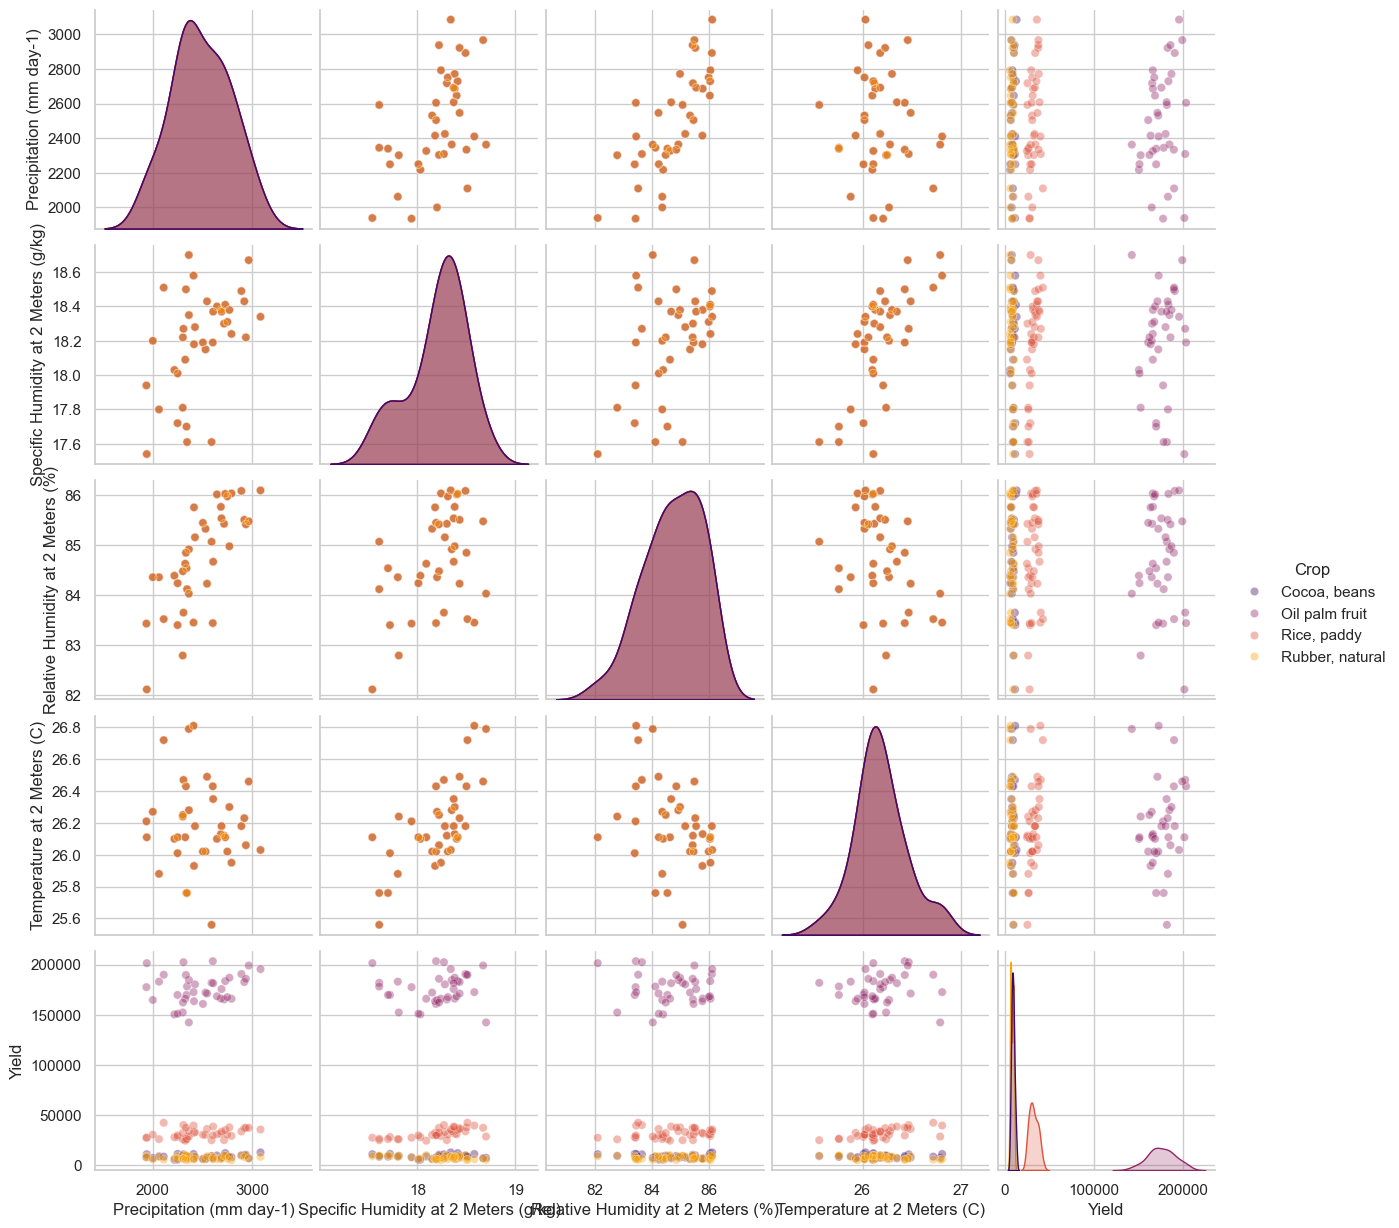

In [44]:
sns.pairplot(df, hue='Crop', diag_kind='kde', palette='inferno', plot_kws={'alpha': 0.4})
plt.show()

###### 2.1 PREPARAÇÃO DOS DADOS

In [45]:
# Seleção das variáveis de interesse
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
            'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
X = df[features]



In [46]:
# Transformando os dados para a mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###### 2.2 ELBOW METHOD

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [48]:
# Escolhendo o número de clusters com base no Elbow Method
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

###### 2.3 PCA

In [ ]:
# Utilizando PCA para redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.title('Visualização dos Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Adicionando MAE

# Carregar o dataset
df = pd.read_csv('crop_yield.csv')

# Definir variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Yield'])  # Remove a coluna alvo
y = df['Yield']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Criar transformadores para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Combinar transformadores em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar o pipeline completo com pré-processamento e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) 

print(f"Coeficiente de Determinação (R²): {r2:.5f}")
print(f"Erro Quadrático Médio (MSE): {mse:.5f}")
print(f"Erro Absoluto Médio (MAE): {mae:.5f}")

Coeficiente de Determinação (R²): 0.99502
Erro Quadrático Médio (MSE): 19308693.24484
Erro Absoluto Médio (MAE): 3132.79638


###### 2.4 DBSCAN

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Outlier'] = dbscan.fit_predict(X_scaled)
outliers = df[df['Outlier'] == -1]

print("Cenários discrepantes (outliers):")
display(outliers)

# Visualização dos outliers
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Outlier'], cmap='inferno', marker='o')
plt.title('Identificação de Outliers (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Outlier')
plt.show()



###### 2.6 ANÁLISE DOS CLUSTERS E OUTLIERS

In [ ]:
# Análise dos clusters e outliers
print("Estatísticas descritivas por cluster:")
display(df.groupby('Cluster')[features_list].mean())

print("\nEstatísticas descritivas dos outliers:")
display(outliers[features_list].describe())

###### INDICE DA SILHUETA

In [159]:

eps = 0.5
min_samples = 5

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
labels = db.labels_

# Calcular o Índice de Silhueta 
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Índice de Silhueta para eps={eps} e min_samples={min_samples}: {silhouette_avg}")
else:
    print("Apenas um cluster ou todos os pontos são ruído.")

Índice de Silhueta para eps=0.5 e min_samples=5: -0.14297043534313136


In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

min_samples = 5  
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort the distances
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the graph
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel(f'Distance to {min_samples}-th Nearest Neighbor')
plt.title('Nearest Neighbor Distance Graph')
plt.show()

In [ ]:
# Selecionar as colunas numéricas para o clustering
features = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
               'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']]

# Normalizar os dados 
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(features_normalized)

# Adicionar os rótulos ao DataFrame
df['Cluster'] = dbscan_labels

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico 1: Com outliers
for cluster in np.unique(dbscan_labels):
    if cluster != -1:  # Ignorar outliers
        ax1.scatter(df[dbscan_labels == cluster]['Precipitation (mm day-1)'],
                    df[dbscan_labels == cluster]['Yield'],
                    label=f'Cluster {cluster}', alpha=0.6)

# Plotar os outliers (cluster -1) com uma cor/marcador diferente
outliers = df[dbscan_labels == -1]
ax1.scatter(outliers['Precipitation (mm day-1)'], outliers['Yield'],
            color='red', marker='x', label='Outliers', alpha=0.6)

ax1.set_xlabel('Precipitation (mm day-1)')
ax1.set_ylabel('Yield')
ax1.set_title('Clusters com Outliers (DBSCAN)')
ax1.legend()

# Gráfico 2: Sem outliers
for cluster in np.unique(dbscan_labels):
    if cluster != -1:  # Ignorar outliers
        ax2.scatter(df[dbscan_labels == cluster]['Precipitation (mm day-1)'],
                    df[dbscan_labels == cluster]['Yield'],
                    label=f'Cluster {cluster}', alpha=0.6)

ax2.set_xlabel('Precipitation (mm day-1)')
ax2.set_ylabel('Yield')
ax2.set_title('Clusters sem Outliers (DBSCAN)')
ax2.legend()

plt.show()

###### COMENTÁRIOS:
###### A justificativa para a escolha de valores menores de eps e min_samples no DBSCAN se deu para preservar os 4 labels originais do dataset. O maior Indice de Silhueta (eps= 1.5 e min_samples = 5) classifica o dataset em  2 clusters. Optamos por escolher eps = 0.5 e min_samples = 5 para manter a classificação em 4 clusters. 


### 3. MODELOS PREDITIVOS

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Função para avaliar o modelo com múltiplas métricas
def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R²: {r2:.2f}')

# Função para realizar validação cruzada
def cross_validate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    print(f'Cross-Validation MSE: {np.mean(mse_scores):.2f} (± {np.std(mse_scores):.2f})')
    print(f'Cross-Validation MAE: {np.mean(mae_scores):.2f} (± {np.std(mae_scores):.2f})')
    print(f'Cross-Validation R²: {np.mean(r2_scores):.2f} (± {np.std(r2_scores):.2f})')

###### 3.1 Regressão Linear

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento: Codificar variáveis categóricas e escalonar numéricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=(['object'])).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Criar o pipeline com pré-processamento e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Função para avaliar o modelo com múltiplas métricas
def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R²: {r2:.2f}')

# Função para realizar validação cruzada
def cross_validate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    print(f'Cross-Validation MSE: {np.mean(mse_scores):.2f} (± {np.std(mse_scores):.2f})')
    print(f'Cross-Validation MAE: {np.mean(mae_scores):.2f} (± {np.std(mae_scores):.2f})')
    print(f'Cross-Validation R²: {np.mean(r2_scores):.2f} (± {np.std(r2_scores):.2f})')

# Chamando a funcao evaluate_model 
print("Evaluation of the Linear Regression Model:")
evaluate_model(model, X_test, y_test, y_pred)

# Cross-validation
print("\nCross-Validation of the Linear Regression Model:")
cross_validate_model(model, X, y)

Evaluation of the Linear Regression Model:
MSE: 6089252186.02
MAE: 64800.59
R²: -0.08

Cross-Validation of the Linear Regression Model:
Cross-Validation MSE: 5247017081.79 (± 759704147.50)
Cross-Validation MAE: 61695.36 (± 4546.37)
Cross-Validation R²: -0.07 (± 0.03)


###### 3.2 Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de Árvore de Decisão:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de Árvore de Decisão:")
cross_validate_model(model, X, y)

Avaliação do Modelo de Árvore de Decisão:
MSE: 31813142.25
MAE: 3440.69
R²: 0.99

Validação Cruzada do Modelo de Árvore de Decisão:
Cross-Validation MSE: 73671597.74 (± 26635203.90)
Cross-Validation MAE: 4933.16 (± 991.86)
Cross-Validation R²: 0.99 (± 0.00)


###### 3.3 Random Forest

In [218]:
from sklearn.ensemble import RandomForestRegressor

# Ajustar o preprocessor para lidar apenas com colunas numéricas
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# Criar o pipeline com pré-processamento e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de Random Forest:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de Random Forest:")
cross_validate_model(model, X, y)

Avaliação do Modelo de Random Forest:
MSE: 7405960032.91
MAE: 72215.17
R²: -0.91

Validação Cruzada do Modelo de Random Forest:
Cross-Validation MSE: 8567711829.33 (± 860223541.65)
Cross-Validation MAE: 78418.28 (± 4475.27)
Cross-Validation R²: -0.76 (± 0.12)


###### 3.4 SVR

In [197]:
from sklearn.svm import SVR

X = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
        'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = df['Yield']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Evaluating the model with multiple metrics
print("Evaluation of the SVR Model (Linear Kernel):")
evaluate_model(model, X_test_scaled, y_test, y_pred)

# Cross-validation
print("\nCross-Validation of the SVR Model (Linear Kernel):")
cross_validate_model(model, X, y)



Evaluation of the SVR Model (Linear Kernel):
MSE: 5086072592.41
MAE: 38975.27
R²: -0.31

Cross-Validation of the SVR Model (Linear Kernel):
Cross-Validation MSE: 6434647011.29 (± 1085387237.40)
Cross-Validation MAE: 49211.91 (± 6392.21)
Cross-Validation R²: -0.32 (± 0.16)


In [ ]:
X = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
          'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = df['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='poly', degree=3)  
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de SVR (Kernel Polinomial):")
evaluate_model(model, X_test_scaled, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de SVR (Kernel Polinomial):")
cross_validate_model(model, X, y)

Avaliação do Modelo de SVR (Kernel Polinomial):
MSE: 5085828861.84
MAE: 38975.29
R²: -0.31

Validação Cruzada do Modelo de SVR (Kernel Polinomial):
Cross-Validation MSE: 6507345183.77 (± 1295143022.66)
Cross-Validation MAE: 48992.28 (± 6340.52)
Cross-Validation R²: -0.33 (± 0.17)


In [203]:
# SVR com Kernel RBF

X = df[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
          'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = df['Yield']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = SVR(kernel='rbf')  
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de SVR (Kernel RBF):")
evaluate_model(model, X_test_scaled, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de SVR (Kernel RBF):")
cross_validate_model(model, X, y)

Avaliação do Modelo de SVR (Kernel RBF):
MSE: 5085748341.65
MAE: 38974.92
R²: -0.31

Validação Cruzada do Modelo de SVR (Kernel RBF):
Cross-Validation MSE: 6507239652.68 (± 1295069466.77)
Cross-Validation MAE: 48991.97 (± 6340.42)
Cross-Validation R²: -0.33 (± 0.17)


###### 3.5 XGBoost

In [182]:
from xgboost import XGBRegressor

# Criar o pipeline com pré-processamento e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com múltiplas métricas
print("Avaliação do Modelo de XGBoost:")
evaluate_model(model, X_test, y_test, y_pred)

# Validação cruzada
print("\nValidação Cruzada do Modelo de XGBoost:")
cross_validate_model(model, X, y)

Avaliação do Modelo de XGBoost:
MSE: 34544440.00
MAE: 3550.51
R²: 0.99

Validação Cruzada do Modelo de XGBoost:
Cross-Validation MSE: 79425669.60 (± 38974059.33)
Cross-Validation MAE: 4818.29 (± 935.11)
Cross-Validation R²: 0.98 (± 0.01)


###### 3.6 Resultados dos Modelos Preditivos

###### Salvando o dataframe dos resultados dos modelos preditivos

In [ ]:

m_preditivos = {
    'Modelo': [],
    'MSE': [],
    'MAE': [],
    'R²': [],
    'Cross-Validation MSE': [],
    'Cross-Validation MSE (± Desvio)': [],
    'Cross-Validation MAE': [],
    'Cross-Validation MAE (± Desvio)': [],
    'Cross-Validation R²': [],
    'Cross-Validation R² (± Desvio)': []
}

models = {
    'XGBoost': XGBRegressor(),
    'SVR (Kernel RBF)': SVR(kernel='rbf'),
    'SVR (Kernel Polinomial)': SVR(kernel='poly', degree=3),
    'SVR (Kernel Linear)': SVR(kernel='linear'),
    'Random Forest': RandomForestRegressor(),
    'Árvore de Decisão': DecisionTreeRegressor(),
    'Regressão Linear': LinearRegression()
}

for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = model.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Validação cruzada
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    cv_r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    
    cv_mse_mean = np.mean(cv_mse_scores)
    cv_mse_std = np.std(cv_mse_scores)
    cv_mae_mean = np.mean(cv_mae_scores)
    cv_mae_std = np.std(cv_mae_scores)
    cv_r2_mean = np.mean(cv_r2_scores)
    cv_r2_std = np.std(cv_r2_scores)
    
    # Armazenar os resultados no dicionário
    m_preditivos['Modelo'].append(model_name)
    m_preditivos['MSE'].append(mse)
    m_preditivos['MAE'].append(mae)
    m_preditivos['R²'].append(r2)
    m_preditivos['Cross-Validation MSE'].append(cv_mse_mean)
    m_preditivos['Cross-Validation MSE (± Desvio)'].append(f"± {cv_mse_std:.2f}")
    m_preditivos['Cross-Validation MAE'].append(cv_mae_mean)
    m_preditivos['Cross-Validation MAE (± Desvio)'].append(f"± {cv_mae_std:.2f}")
    m_preditivos['Cross-Validation R²'].append(cv_r2_mean)
    m_preditivos['Cross-Validation R² (± Desvio)'].append(f"± {cv_r2_std:.2f}")

# Converter o dicionário em um DataFrame
df_results = pd.DataFrame(m_preditivos)

# Salvar os resultados em um arquivo CSV
df_results.to_csv('resultados_modelos_preditivos.csv', index=False)

# Exibir o DataFrame
display(df_results)

##### SELEÇÃO DO MELHOR MODELO E OTIMIZAÇÃO DE HIPERPARÂMETROS

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# 1. Grid Search para SVR (Kernel Linear)
param_grid_svr_linear = {
    'C': [0.1, 1, 10, 100],  
    'epsilon': [0.01, 0.1, 0.5, 1]  
}

svr_linear = SVR(kernel='linear')
grid_search_svr_linear = GridSearchCV(svr_linear, param_grid_svr_linear, cv=5, scoring='r2', n_jobs=-1)
grid_search_svr_linear.fit(X_train_scaled, y_train)

print("Melhores hiperparâmetros para SVR (Linear):", grid_search_svr_linear.best_params_)
print("Desempenho do SVR (Linear):")
y_pred_svr_linear = grid_search_svr_linear.predict(X_test_scaled)
evaluate_model(grid_search_svr_linear, X_test_scaled, y_test, y_pred_svr_linear)

# 2. Grid Search para SVR (Kernel RBF)
param_grid_svr_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'epsilon': [0.01, 0.1, 0.5, 1]
}

svr_rbf = SVR(kernel='rbf')
grid_search_svr_rbf = GridSearchCV(svr_rbf, param_grid_svr_rbf, cv=5, scoring='r2', n_jobs=-1)
grid_search_svr_rbf.fit(X_train_scaled, y_train)

print("Melhores hiperparâmetros para SVR (RBF):", grid_search_svr_rbf.best_params_)
y_pred_svr_rbf = grid_search_svr_rbf.predict(X_test_scaled)
print("Desempenho do SVR (RBF):")
evaluate_model(grid_search_svr_rbf, X_test_scaled, y_test, y_pred_svr_rbf)

# 3. Grid Search para SVR (Kernel Polinomial)
param_grid_svr_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],  
    'epsilon': [0.01, 0.1, 0.5, 1]
}

svr_poly = SVR(kernel='poly')
grid_search_svr_poly = GridSearchCV(svr_poly, param_grid_svr_poly, cv=5, scoring='r2', n_jobs=-1)
grid_search_svr_poly.fit(X_train_scaled, y_train)

y_pred_svr_poly = grid_search_svr_poly.predict(X_test_scaled)
print("Desempenho do SVR (Polinomial):")
evaluate_model(grid_search_svr_poly, X_test_scaled, y_test, y_pred_svr_poly)

# 4. Grid Search para Regressão Linear
param_grid_lr = {
    'fit_intercept': [True, False],  
    'positive': [True, False]  
}

lr = LinearRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='r2', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

y_pred_lr = grid_search_lr.predict(X_test_scaled)
print("Melhores hiperparâmetros para Regressão Linear:", grid_search_lr.best_params_)
print("Desempenho da Regressão Linear:")
evaluate_model(grid_search_lr, X_test_scaled, y_test, y_pred_lr)

# 5. Grid Search para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

y_pred_rf = grid_search_rf.predict(X_test_scaled)
print("Melhores hiperparâmetros para Random Forest:", grid_search_rf.best_params_)
print("Desempenho do Random Forest:")
evaluate_model(grid_search_rf, X_test_scaled, y_test, y_pred_rf)

# 6. Random Search para XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

xgb = XGBRegressor(random_state=42)
random_search_xgb = RandomizedSearchCV(xgb, param_dist_xgb, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = random_search_xgb.predict(X_test_scaled)
print("Melhores hiperparâmetros para XGBoost:", random_search_xgb.best_params_)
print("Desempenho do XGBoost:")
evaluate_model(random_search_xgb, X_test_scaled, y_test, y_pred_xgb)

# 7. Métodos de Ensemble
# Modelos base
rf_model = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
xgb_model = XGBRegressor(**random_search_xgb.best_params_, random_state=42)
svr_model = SVR(kernel='rbf')
lr_model = LinearRegression()

# Stacking
stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('svr', svr_model), ('lr', lr_model), ('svr_poly', grid_search_svr_poly)],
    final_estimator=lr_model
)
stacking_model.fit(X_train_scaled, y_train)

y_pred_stacking = stacking_model.predict(X_test_scaled)
print("Desempenho do Stacking:")
evaluate_model(stacking_model, X_test_scaled, y_test, y_pred_stacking)

# Voting
voting_model = VotingRegressor(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('svr', svr_model)]
)
voting_model.fit(X_train_scaled, y_train)

y_pred_voting = voting_model.predict(X_test_scaled)
print("Desempenho do Voting:")
evaluate_model(voting_model, X_test_scaled, y_test, y_pred_voting)

# 8. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)
print("Desempenho do Gradient Boosting:")
evaluate_model(gb_model, X_test_scaled, y_test, y_pred_gb)

# Inicializar a lista de resultados
results = []

# Função para avaliar e armazenar os resultados
def evaluate_and_store_results(model_name, model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    })

# Avaliar e armazenar os resultados de cada modelo
evaluate_and_store_results("SVR (Linear)", grid_search_svr_linear, X_test_scaled, y_test, y_pred_svr_linear)
evaluate_and_store_results("SVR (RBF)", grid_search_svr_rbf, X_test_scaled, y_test, y_pred_svr_rbf)
evaluate_and_store_results("SVR (Polinomial)", grid_search_svr_poly, X_test_scaled, y_test, y_pred_svr_poly)
evaluate_and_store_results("Regressão Linear", grid_search_lr, X_test_scaled, y_test, y_pred_lr)
evaluate_and_store_results("Random Forest", grid_search_rf, X_test_scaled, y_test, y_pred_rf)
evaluate_and_store_results("XGBoost", random_search_xgb, X_test_scaled, y_test, y_pred_xgb)
evaluate_and_store_results("Stacking", stacking_model, X_test_scaled, y_test, y_pred_stacking)
evaluate_and_store_results("Voting", voting_model, X_test_scaled, y_test, y_pred_voting)
evaluate_and_store_results("Gradient Boosting", gb_model, X_test_scaled, y_test, y_pred_gb)

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Salvar os resultados em um arquivo CSV
results_df.to_csv('melhores_hiperparametros.csv', index=False)

print("Resultados salvos em 'melhores_hiperparametros.csv'")

# CONCLUSOES

Dentre os modelos testados no Dataset "yeld_crop.csv', o modelo com as melhores métricas foi o XGBoost. Esse modelo apresentou o menor MSE e MAE em comparação aos outros modelos utilizados. Com relação ao R2, o XGBoost tambem apresentou o valor mais proximo de zero. 
A otimização dos hiperparâmetros (subsample: 0.8, n_estimators: 100, max_depth: 3, learning_rate: 0.01) contribuiram para melhorar o desempenho do modelo.

Todos os modelos apresentaram R² negativo e MAE/MSE elevados, indicando uma performance pior em comparação modelos medianos de previsão de dados. Aparentemente  os modelos não conseguiram explicar a relação entre as variáveis.

Os métodos de ensemble (Stacking e Voting) não trouxeram melhorias significativas em relação aos modelos individuais, mostrando que a combinação de modelos não resolveu a questão subjacente dos dados.  

A Regressão Linear teve um desempenho próximo ao do XGBoost, com R² de -0,05, sugerindo que a relação entre as variáveis independentes (como precipitação, umidade e temperatura) e a variável dependente (produção agrícola, ou Yield) não parece ser tão complicada a ponto de exigir modelos extremamente sofisticados para capturá-la. 

Os resultados sugerem o dataset pode ter problemas associados a falta de variaveis independentes relevantes, não linearidade e presença de outliers ou ruidosrs ou ruídos.
